# Lugar de las raíces usando Python

In [1]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

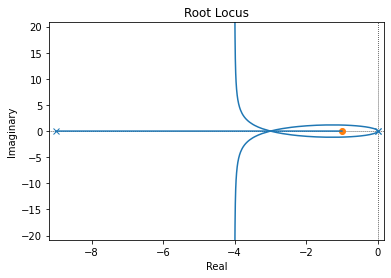

In [2]:
G=ctrl.tf([1,1],[1,9, 0, 0])
_=ctrl.rlocus(G, grid=False, plot=True)

El símbolo `_` evita que envíe a consola lo que devuelve la función `rlocus`. Si queremos obtener lo que devuelve deberíamos escribir.

In [3]:
r=ctrl.rlocus(G, plot=False)
type(r)

tuple

Como podemos ver, r es una tupla con dos array. El primero contiene la posición de las raíces y la segunda la ganancia para las cuales se dan esas raíces.

Recordando lo que vimos en la introducción a Python podemos expandir la tupla y poner los dos datos (ganancias y raíces para cada ganancia) en dos variables separadas.

In [4]:
roots_list, k = r

o bien directamente podemos hacer lo mismo con

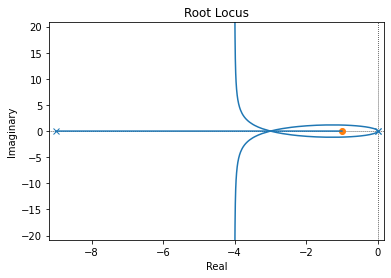

In [5]:
roots_list, k = ctrl.rlocus(G, plot=True, grid=False)

## Condición de Magnitud y Fase para un punto en particular del plano $s$

En Python para evaluar la función transferencia en un punto del plano $s$, solo es necesario:

In [6]:
G2=ctrl.tf([1],[1, 4, 8, 0])
pto=-0.667+2j
G2(pto)

(-0.08439398595769328+1.89881723735337e-05j)

Para calcular $K$ debemos saber que en ese punto la modulo de $\left|KG(s)\right|$ debe ser 1. Entonces

$$
K=\frac{1}{\left|G(s_o)\right|}
$$

Sabiendo que la función `abs` de `numpy` aplicada sobre un número complejo o un vector devuelve el módulo,  podemos realizar la cuenta anterior en Python de la siguiente manera:

In [7]:
K=1/np.abs(G2(pto)) 
K

11.849185262917503

Para verificar que ese punto es efectivamente lugar geométrico de las raíces podemos hacer

In [8]:
np.angle(G2(pto))*180/np.pi

179.98710877194665

In [9]:
# o en grados
np.angle(G2(pto),deg=True)

179.98710877194665

Podemos ver que si bien el resultado no es 180, es un número muy cercando a este, por que el lugar de las raíces pasa por un punto muy cercano al evaluado cuando la ganancia es un número muy cercano a 11.85.

In [10]:
z1=G2(-.5+2.2j)
z2=G2(-.5-2.2j)
theta1=np.angle(z1,deg=True)
theta2=np.angle(z2,deg=True)
print(theta1,theta2)

179.25491462417511 -179.25491462417511


Con el cálculo anterior pretendo mostrar que la función `angle()` devuelve el ángulo de un número complejo, el signo depende del cuadrante donde se encuentre el número complejo. Por lo que, hay que tener cuidado a la hora de usarlo e interpretarlo.

### Trazado del lugar geométrico de las raíces para ganancias negativas

Internamente Python grafica el lugar de las raíces tomando una serie de ganancias y calculando los polos del sistema a lazo cerrado.

Para obtener el Lugar geométrico de las raíces para ganancias negativas lo único necesario será cambiar el signo a la función transferencia.

Para el ejemplo anterior, el lugar de las raíces sería:

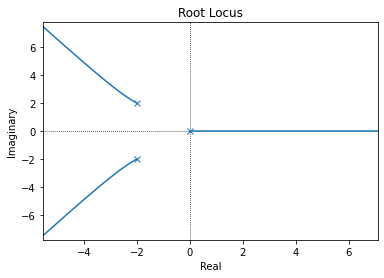

In [11]:
_=ctrl.rlocus(-G2, grid=False)